<a href="https://colab.research.google.com/github/AlirezaAK2000/Digit-Recognition/blob/master/AI_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


In [4]:
train_images_file = open('drive/MyDrive/colab samples/train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('drive/MyDrive/colab samples/train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)


8

In [5]:
train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))



In [6]:
# Reading The Test Set
test_images_file = open('drive/MyDrive/colab samples/t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('drive/MyDrive/colab samples/t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


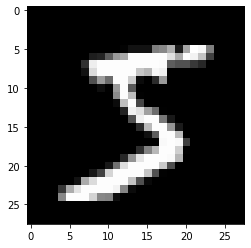

In [7]:
# Plotting an image
show_image(train_set[0][0])
plt.show()

In [8]:
train_set_x_v = np.transpose(np.squeeze(np.array([rec[0] for rec in train_set])))
train_set_x_v.shape
test_set_x_v = np.transpose(np.squeeze(np.array([rec[0] for rec in test_set])))
test_set_x_v.shape

(784, 10000)

In [9]:
train_set_y_v = np.transpose(np.squeeze(np.array([rec[1] for rec in train_set])))
train_set_y_v.shape
test_set_y_v = np.transpose(np.squeeze(np.array([rec[1] for rec in test_set])))
test_set_y_v.shape

(10, 10000)

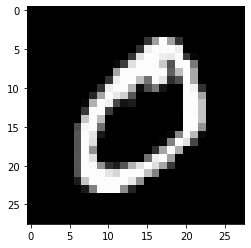

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
show_image(np.transpose(train_set_x_v[:,1]))
plt.show()
train_set_y_v[1]

In [11]:
def sigmoid(A):
  return 1/(1+np.exp(-1 * A))
def sigmoid_deriv(A):
  sig = sigmoid(A)
  return sig * (1 - sig)

def softmax(A):
  e = np.exp(A)
  return e / np.sum(e)

In [39]:
model = [
    (train_set_x_v.shape[0] , None),
    (16 , sigmoid ,sigmoid_deriv ),
    (16 , sigmoid ,sigmoid_deriv ),
    (10 , sigmoid , sigmoid_deriv),

]
model

[(784, None),
 (16, <function __main__.sigmoid>, <function __main__.sigmoid_deriv>),
 (16, <function __main__.sigmoid>, <function __main__.sigmoid_deriv>),
 (10, <function __main__.sigmoid>, <function __main__.sigmoid_deriv>)]

In [40]:
np.random.seed(2)
def get_dimensions(model):
  dimensions = [(model[i+1][0], model[i][0]) for i in range(len(model)-1)]
  return dimensions
dimensions = get_dimensions(model)

In [41]:
def initializer(shape ):
  w = np.random.randn(shape[0],shape[1]) * 0.01
  b = np.random.randn(shape[0] , 1) * 0.01
  return (w , b)

In [42]:
def initialize(model):
  W = []
  B = []
  for shape in dimensions:
    w , b  = initializer(shape)
    assert(w.shape == shape)
    assert(b.shape == (shape[0] , 1))
    W.append(w)
    B.append(b)
  return W , B
W , B = initialize(model)

In [43]:
def mse_cost(y , y_prim):
  return np.sum((y_prim-y)**2)/y.shape[1]

In [44]:
def forward_propagation(X , W , B,model):
  layers_num = len(W)
  A = [X]
  Z = []
  for i in range(layers_num):
    # assert(W[i].shape[1] == X.shape[0])
    z = W[i] @ A[i] + B[i]
    a = model[i + 1][1](z)
    A.append(a)
    Z.append(z)
    # print(z.shape)
  return {
      'A':A,
      'Z':Z
  }

In [45]:
# print(train_set_x_v.shape)
cache = forward_propagation(train_set_x_v , W , B,model)
assert(train_set_y_v.shape == cache['A'][-1].shape)
for i in cache['A']:
  print(i.shape)

(784, 60000)
(16, 60000)
(16, 60000)
(10, 60000)


In [46]:
mse_cost(train_set_y_v,cache['A'][-1])
cache['Z'][0].shape

(16, 60000)

In [47]:
def backward_propagation(W , B , cache, Y , model):
  A , Z = cache['A'] ,cache['Z']
  # print(Z)
  dW , dB= [] , []
  layers_num = len(W)
  tmp = (2 * (A[-1] - Y)) * model[-1][2](Z[-1])
  db = tmp  @ np.ones((A[-1].shape[1],1))
  dw = tmp  @ np.transpose(A[-2])
  dA = [np.transpose(W[-1]) @ tmp]
  assert(dw.shape == W[-1].shape)
  assert(db.shape == B[-1].shape)
  dW.append(dw)
  dB.append(db)
  for i in reversed(range(layers_num - 1)):
    tmp = dA[0] * model[i+1][2](Z[i])
    db = tmp @ np.ones((tmp.shape[1],1))
    dw = tmp @ np.transpose(A[i])
    da = np.transpose(W[i]) @ tmp
    dA.insert(0,da)
    dW.insert(0,dw)
    dB.insert(0,db)
    assert(dw.shape == W[i].shape)
    assert(db.shape == B[i].shape)

  return {
      'dW':dW,
      'dB':dB
  }

In [48]:
a = backward_propagation(W,B, cache,train_set_y_v , model)

In [49]:
from collections import defaultdict
def test(W, B , X ,Y , model):
  cache = forward_propagation(X , W , B , model)
  Y_prim = cache['A'][-1]
  Y_prim = np.round(Y_prim)
  result = defaultdict(lambda : 0,dict(zip(*(np.unique((Y_prim == Y).all(0) , return_counts=True)))))
  return result[True] / (result[True] + result[False]) * 100


def main_model(model , X , Y ,X_test , Y_test , epoch=200 , batch_size=20 , a=1):
  num_iteration = X.shape[1]//batch_size
  W , B = initialize(model)
  for i in range(epoch):
    cost = None
    for j in range(num_iteration):
      batch_x = X[:,j*batch_size:(j+1)*batch_size]
      batch_y = Y[:,j*batch_size:(j+1)*batch_size]
      cache = forward_propagation(batch_x , W,B,model)
      cost = mse_cost(batch_y , cache['A'][-1])
      gradients = backward_propagation(W , B , cache , batch_y , model)
      for k in range(len(W)):
        W[k] = W[k] - a * gradients['dW'][k]
        B[k] = B[k] - a * gradients['dB'][k]
    if i % 10 == 0:
      train_accuracy = test(W , B , X , Y , model)
      test_accuracy = test(W , B , X_test , Y_test , model)
      print(f'*** epoch : {i} ======> cost : {cost} , train accuracy : {train_accuracy} , test accuracy : {test_accuracy}')

  train_accuracy = test(W , B , X , Y , model)
  test_accuracy = test(W , B , X_test , Y_test , model)
  print('__________________________________________________')
  print(f"train accuracy: {train_accuracy}")
  print(f"test accuracy: {test_accuracy}")  




In [50]:
main_model(model , train_set_x_v, train_set_y_v,test_set_x_v , test_set_y_v,a=0.01, epoch=200)

*** epoch : 0 ======> cost : 0.9014085147498573 , train accuracy : 0.0 , test accuracy : 0.0
*** epoch : 10 ======> cost : 0.06412643795461358 , train accuracy : 87.265 , test accuracy : 87.4
*** epoch : 20 ======> cost : 0.01848301003709358 , train accuracy : 92.41666666666667 , test accuracy : 91.7
*** epoch : 30 ======> cost : 0.018401126782970897 , train accuracy : 93.845 , test accuracy : 92.49000000000001
*** epoch : 40 ======> cost : 0.01817091182734481 , train accuracy : 94.60166666666666 , test accuracy : 93.07
*** epoch : 50 ======> cost : 0.024019878276576864 , train accuracy : 95.00333333333333 , test accuracy : 93.37
*** epoch : 60 ======> cost : 0.017508074459446254 , train accuracy : 95.275 , test accuracy : 93.46
*** epoch : 70 ======> cost : 0.011230818251220649 , train accuracy : 95.52833333333334 , test accuracy : 93.51
*** epoch : 80 ======> cost : 0.010496166832056132 , train accuracy : 95.695 , test accuracy : 93.57
*** epoch : 90 ======> cost : 0.0092056312166403